In [ ]:
#importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics
from prettytable import PrettyTable
from matplotlib.ticker import AutoMinorLocator
from tabulate import tabulate

#feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#for pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#For Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import graphviz 

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#k Nearest Neighbours
from sklearn import neighbors

#Neural Network
from sklearn.neural_network import MLPClassifier



In [ ]:
#for ignoring warnings 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing train and test files

from google.colab import files
file = files.upload()

Saving Test_data.csv to Test_data.csv
Saving Train_data.csv to Train_data.csv


# **1. Data Cleaning**

In [ ]:
df_train=pd.read_csv('Train_data.csv') #initilizing train dataframe
df_test=pd.read_csv('Test_data.csv')   #initializing test dataframe

a. Train Data

In [ ]:
df_train.shape

(22745, 15)

In [ ]:
#TRAIN DATA

#replacing blank values with nan
df_train.replace(r'^\s*$', np.nan, regex=True,inplace=True)

#to drop rows with nan values
df_train.dropna(inplace=True)

#size of latest dataframe
df_train.shape

(21081, 15)

b. Test Data

In [ ]:
df_test.shape

(9816, 15)

In [ ]:
#TEST DATA

#replacing blank values with nan
df_test.replace(r'^\s*$', np.nan, regex=True,inplace=True)

#to drop rows with nan values
df_test.dropna(inplace=True)

#size of latest dataframe
df_test.shape

(9816, 15)

# **2. Exploratory Data Analysis**

2.1. Correlation plot for predictors

In [ ]:
#correlation matrix for all the numerical variables
corr = df_train.iloc[:,0:15].corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,hours_per_week
Age,1.000000,-0.077267,0.037951,0.077115,0.054182,0.094287
fnlwgt,-0.077267,1.000000,-0.043014,0.001633,-0.016023,-0.018687
Education_num,0.037951,-0.043014,1.000000,0.119098,0.076595,0.147594
Capital_gain,0.077115,0.001633,0.119098,1.000000,-0.031869,0.076709
Capital_loss,0.054182,-0.016023,0.076595,-0.031869,1.000000,0.054134
hours_per_week,0.094287,-0.018687,0.147594,0.076709,0.054134,1.000000


2.2.  Countplot showing the number of people of both Income categories

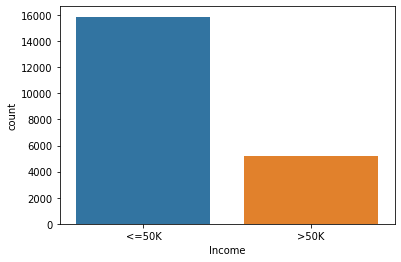

In [ ]:
#Countplot showing the number of people of both Income categories
sns.countplot('Income',data=df_train)
plt.show()



---


2.3.  Histogram showing Age and Income

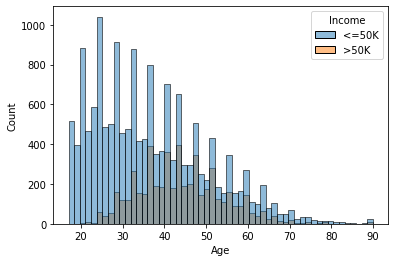

In [ ]:
# Histogram showing Age and Income
sns.histplot(df_train, x='Age', hue = 'Income',)


We can observe from this plot that people who have income less than 50K lies in the age category of 20-30 years. While people in the age category of 35-45 years have income greater than 50K.


---



2.4.  Point plot between Sex, hours per week and Income of the person

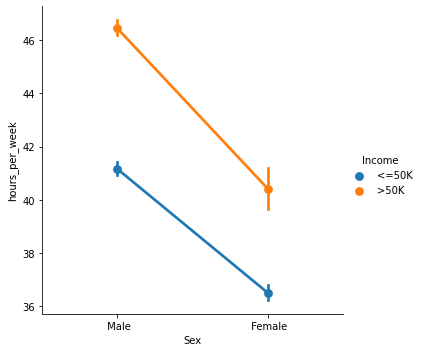

In [ ]:
#Point plot between Sex, hours per week and Income of the person
sns.catplot(x="Sex", y="hours_per_week", hue="Income", kind="point", data=df_train)


We can observe from this point plot that men works for more than 46 hours per week to get an income more than 50K and woman works between 40-42 per week to get an income more than 50K


---



2.5.  Bar plot showing the Workclass and Age of people separated bt Income

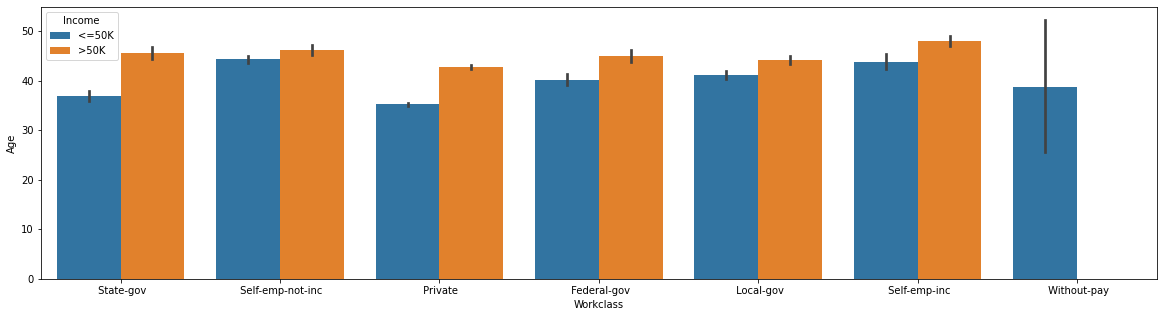

In [ ]:
#Bar plot showing the Workclass and Age of people separated bt Income
fig= plt.figure (figsize=(20,5)) 
sns.barplot(x="Workclass", y='Age', hue="Income", data= df_train)


We can observe from the plot that for almost all the work classes people who are earning income more than 50K has age more than 40.

#**3. Pre-processing**

ENCODING data

In [ ]:
#---------------Train-----------------
#INPUT
lb_make = LabelEncoder()
df_train['Workclass'] = lb_make.fit_transform(df_train['Workclass'])
df_train['Education'] = lb_make.fit_transform(df_train['Education'])
df_train['Marital_status'] = lb_make.fit_transform(df_train['Marital_status'])
df_train['Occupation'] = lb_make.fit_transform(df_train['Occupation'])
df_train['Relationship'] = lb_make.fit_transform(df_train['Relationship'])
df_train['Race'] = lb_make.fit_transform(df_train['Race'])
df_train['Native_country'] = lb_make.fit_transform(df_train['Native_country'])
df_train['Sex'].replace({' Male': '0', ' Female': '1'}, inplace=True)

#OUTPUT
df_train['Income'].replace({'<=50K': '0', '>50K': '1'}, inplace=True)

#---------------Test-----------------
#INPUT
lb_make = LabelEncoder()
df_test['Workclass'] = lb_make.fit_transform(df_test['Workclass'])
df_test['Education'] = lb_make.fit_transform(df_test['Education'])
df_test['Marital_status'] = lb_make.fit_transform(df_test['Marital_status'])
df_test['Occupation'] = lb_make.fit_transform(df_test['Occupation'])
df_test['Relationship'] = lb_make.fit_transform(df_test['Relationship'])
df_test['Race'] = lb_make.fit_transform(df_test['Race'])
df_test['Native_country'] = lb_make.fit_transform(df_test['Native_country'])
df_test['Sex'].replace({' Male': '0', ' Female': '1'}, inplace=True)

#OUTPUT
df_test['Income'].replace({'<=50K': '0', '>50K': '1'}, inplace=True)

#**4. Data partitioning**

In [ ]:
df_train= df_train.drop(['fnlwgt'], axis=1) 
df_test= df_test.drop(['fnlwgt'], axis=1)

X_train= df_train.iloc[:,0:13]
y_train= df_train.iloc[:,13]

X_test= df_test.iloc[:,0:13]
y_test= df_test.iloc[:,13]

#**5. Data Modelling**

# Considering a separate function for Neural Network since it requires scaled input. This function will be called in the ML Pipeline.

In [ ]:
#scaling train data for Neural Network
df_train_nn_scaled = df_train
scaler = StandardScaler()
features = ['Age', 'Education_num', 'Capital_gain','Capital_loss','hours_per_week']
df_train_nn_scaled[features] = scaler.fit_transform(df_train_nn_scaled[features])

#scaling test data for Neural Network
df_test_nn_scaled = df_test
scaler = StandardScaler()
features = ['Age', 'Education_num', 'Capital_gain','Capital_loss','hours_per_week']
df_test_nn_scaled[features] = scaler.fit_transform(df_test_nn_scaled[features])

#Train_test split for Neural Network
X_nn_train= df_train_nn_scaled.iloc[:,0:13]
y_nn_train= df_train_nn_scaled.iloc[:,13]
X_nn_test= df_test_nn_scaled.iloc[:,0:13]
y_nn_test= df_test_nn_scaled.iloc[:,13]

#Neural Network Function
def NN_func():
  results = pd.DataFrame(columns=['Learning Rate', 'Transfer Function', 'Hidden_Layer', 'Accuracy'])
  lr = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 1, 3, 10]
  hidden_layer = [50, 100,150]
  transfer_function = ['identity', 'logistic', 'tanh', 'relu']
  index=0
  for i in lr:
    for j in transfer_function:
      for k in hidden_layer:
        nn_model = MLPClassifier(learning_rate_init= i, activation=j, hidden_layer_sizes= k)
        nn_model.fit(X_nn_train, y_nn_train)
        n_pred = nn_model.predict(X_nn_test)
        accuracy = accuracy_score(y_nn_test, n_pred)
        results.loc[index] = [i, j, k, accuracy]
        index+=1

    print('All results')
    print('\,',results)
    print('--------------------------------------------------------------')
    print('\nBest performing model')      
    print('\n',results[results['Accuracy']==results['Accuracy'].max()])

    #--------------------------------------------------------------------------
    #Since we got maximum accuracy for a set of hyperparameters, we fit our model with them and predict output values
  
    nn_model = MLPClassifier(learning_rate_init= 0.00001, activation='identity', hidden_layer_sizes= 50)
    nn_model.fit(X_nn_train, y_nn_train)
    n_pred = nn_model.predict(X_nn_test)

    y2=np.array(y_nn_test) #datatype conversion for y_test
    print('\n')
    t = PrettyTable(['Metric', 'Value'])
    t.title = 'Neural Network with Data Scaling'
    tn, fp, fn, tp = confusion_matrix(y2, n_pred).ravel()
    t.add_row(['Classification accuracy', accuracy_score(y2.astype(int), n_pred.astype(int))])
    t.add_row(['F1 score', f1_score(y2.astype(int), n_pred.astype(int),average='weighted')])
    t.add_row(['Sensitivity',(tp/(tp+fn))])
    t.add_row(['Specificity',(tn/(tn+fp))])
    print(t)
    print('\n')
    fpr, tpr, thresholds = roc_curve(y2.astype(int), n_pred.astype(int))
    auc = metrics.roc_auc_score(y2.astype(int), n_pred.astype(int))
    plt.plot(fpr,tpr,label="  auc="+str(auc))
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier') 
    plt.grid(True,color='grey')
    plt.show()




Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=0))]),
             param_grid={})>
+----------------------------------------------+
|             Logistic regression              |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8072534637326814 |
|         F1 score        | 0.7804901170828961 |
|       Sensitivity       | 0.3449419568822554 |
|       Specificity       | 0.9578606158833063 |
+-------------------------+--------------------+




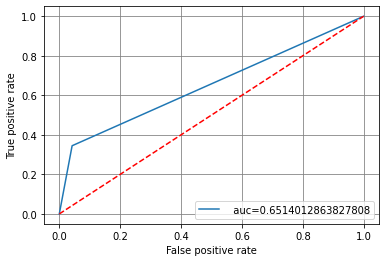





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             param_grid={})>
+----------------------------------------------+
|                     KNN                      |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8354726976365118 |
|         F1 score        | 0.8316088600998667 |
|       Sensitivity       | 0.6024046434494196 |
|       Specificity       | 0.9113992436520799 |
+-------------------------+--------------------+




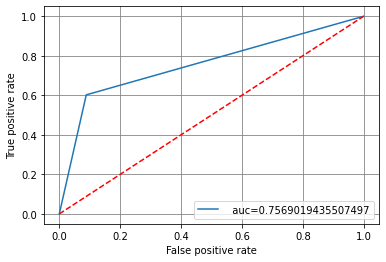





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid={})>
+----------------------------------------------+
|                Decision Tree                 |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.7941116544417278 |
|         F1 score        | 0.7941834725881043 |
|       Sensitivity       | 0.582089552238806  |
|       Specificity       | 0.8631820637493247 |
+-------------------------+--------------------+




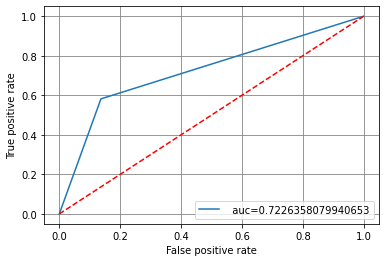





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model',
                                        BaggingClassifier(random_state=0))]),
             param_grid={})>
+----------------------------------------------+
|                 Bagging Tree                 |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8310920945395273 |
|         F1 score        | 0.8213095647072879 |
|       Sensitivity       | 0.5194859038142621 |
|       Specificity       | 0.9326039978390059 |
+-------------------------+--------------------+




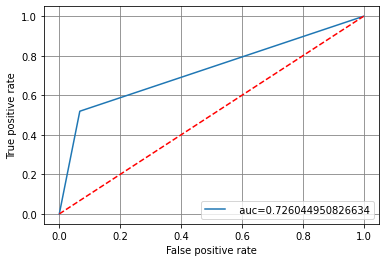





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={})>
+----------------------------------------------+
|                Random Forest                 |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8459657701711492 |
|         F1 score        | 0.8357113478503256 |
|       Sensitivity       | 0.5335820895522388 |
|       Specificity       | 0.9477309562398704 |
+-------------------------+--------------------+




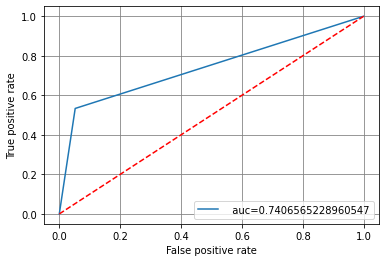





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier(random_state=0))]),
             param_grid={})>
+----------------------------------------------+
|            Gradient Boosting Tree            |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8534026079869601 |
|         F1 score        | 0.8400572290510111 |
|       Sensitivity       | 0.5070480928689884 |
|       Specificity       | 0.9662344678552134 |
+-------------------------+--------------------+




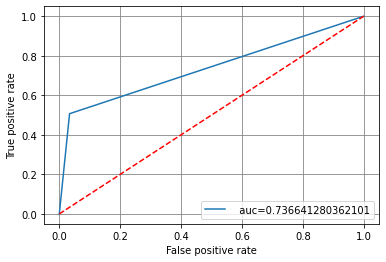





Best hyperparameters:  <bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('model', GaussianNB())]), param_grid={})>
+----------------------------------------------+
|                 Naive Bayes                  |
+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
| Classification accuracy | 0.8052159739201304 |
|         F1 score        |  0.78606611390252  |
|       Sensitivity       | 0.3975953565505804 |
|       Specificity       | 0.9380064829821718 |
+-------------------------+--------------------+




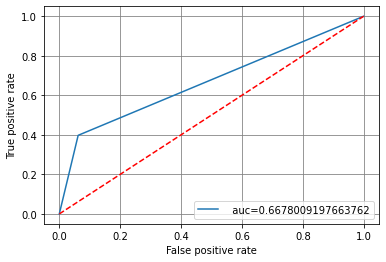



All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
5         0.00001          logistic          150  0.816422
6         0.00001              tanh           50  0.817543
7         0.00001              tanh          100  0.820293
8         0.00001              tanh          150  0.828341
9         0.00001              relu           50  0.817441
10        0.00001              relu          100  0.825387
11        0.00001              relu          150  0.828443
--------------------------------------------------------------

Best performing model

     Learning Rate Transfer Function Hidden_Layer  Accuracy
11        0.00001              relu          150  0.828443


+-------

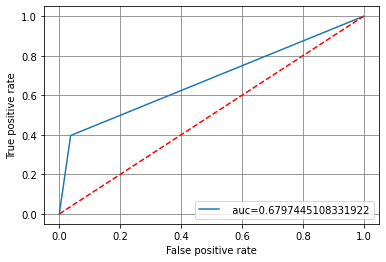

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
5         0.00001          logistic          150  0.816422
6         0.00001              tanh           50  0.817543
7         0.00001              tanh          100  0.820293
8         0.00001              tanh          150  0.828341
9         0.00001              relu           50  0.817441
10        0.00001              relu          100  0.825387
11        0.00001              relu          150  0.828443
12        0.00010          identity           50  0.826508
13        0.00010          identity          100  0.823961
14        0.00010          identity          150  0.824674
15        0.00010          logistic      

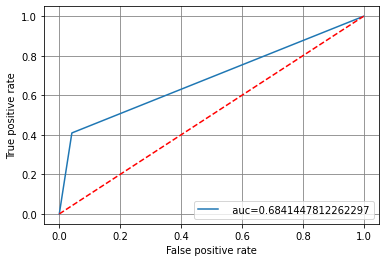

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
5         0.00001          logistic          150  0.816422
6         0.00001              tanh           50  0.817543
7         0.00001              tanh          100  0.820293
8         0.00001              tanh          150  0.828341
9         0.00001              relu           50  0.817441
10        0.00001              relu          100  0.825387
11        0.00001              relu          150  0.828443
12        0.00010          identity           50  0.826508
13        0.00010          identity          100  0.823961
14        0.00010          identity          150  0.824674
15        0.00010          logistic      

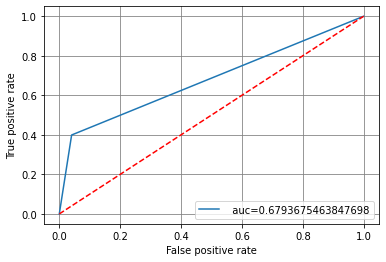

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
5         0.00001          logistic          150  0.816422
6         0.00001              tanh           50  0.817543
7         0.00001              tanh          100  0.820293
8         0.00001              tanh          150  0.828341
9         0.00001              relu           50  0.817441
10        0.00001              relu          100  0.825387
11        0.00001              relu          150  0.828443
12        0.00010          identity           50  0.826508
13        0.00010          identity          100  0.823961
14        0.00010          identity          150  0.824674
15        0.00010          logistic      

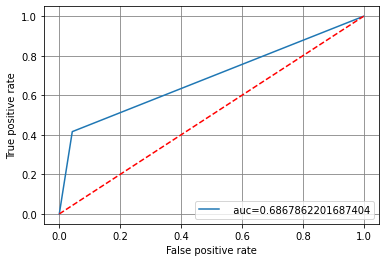

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
5         0.00001          logistic          150  0.816422
6         0.00001              tanh           50  0.817543
7         0.00001              tanh          100  0.820293
8         0.00001              tanh          150  0.828341
9         0.00001              relu           50  0.817441
10        0.00001              relu          100  0.825387
11        0.00001              relu          150  0.828443
12        0.00010          identity           50  0.826508
13        0.00010          identity          100  0.823961
14        0.00010          identity          150  0.824674
15        0.00010          logistic      

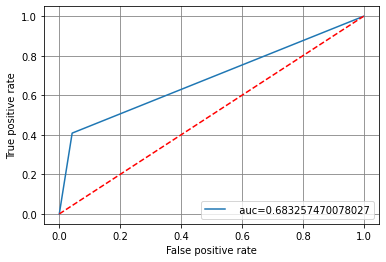

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
..            ...               ...          ...       ...
67        0.03000              tanh          100  0.837205
68        0.03000              tanh          150  0.840363
69        0.03000              relu           50  0.826100
70        0.03000              relu          100  0.840974
71        0.03000              relu          150  0.849735

[72 rows x 4 columns]
--------------------------------------------------------------

Best performing model

     Learning Rate Transfer Function Hidden_Layer  Accuracy
71           0.03              relu          150  0.849735


+---------------------------------------------

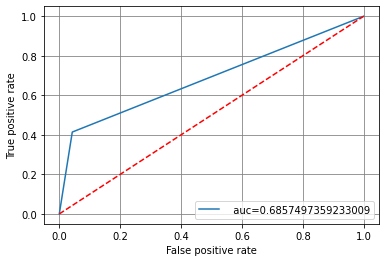

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
..            ...               ...          ...       ...
79        1.00000              tanh          100  0.754279
80        1.00000              tanh          150  0.754279
81        1.00000              relu           50  0.754279
82        1.00000              relu          100  0.754279
83        1.00000              relu          150  0.754075

[84 rows x 4 columns]
--------------------------------------------------------------

Best performing model

     Learning Rate Transfer Function Hidden_Layer  Accuracy
71           0.03              relu          150  0.849735


+---------------------------------------------

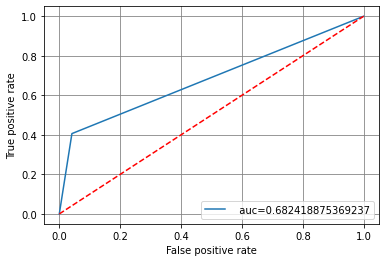

All results
\,     Learning Rate Transfer Function Hidden_Layer  Accuracy
0         0.00001          identity           50  0.822229
1         0.00001          identity          100  0.824674
2         0.00001          identity          150  0.824165
3         0.00001          logistic           50  0.804401
4         0.00001          logistic          100  0.812143
..            ...               ...          ...       ...
91        3.00000              tanh          100  0.754279
92        3.00000              tanh          150  0.754279
93        3.00000              relu           50  0.754177
94        3.00000              relu          100  0.754279
95        3.00000              relu          150  0.754279

[96 rows x 4 columns]
--------------------------------------------------------------

Best performing model

     Learning Rate Transfer Function Hidden_Layer  Accuracy
71           0.03              relu          150  0.849735


+---------------------------------------------

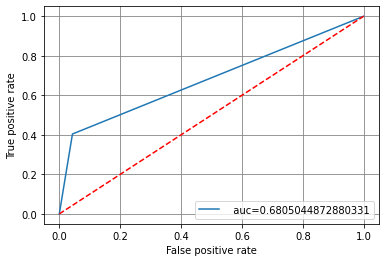

All results
\,      Learning Rate Transfer Function Hidden_Layer  Accuracy
0          0.00001          identity           50  0.822229
1          0.00001          identity          100  0.824674
2          0.00001          identity          150  0.824165
3          0.00001          logistic           50  0.804401
4          0.00001          logistic          100  0.812143
..             ...               ...          ...       ...
103       10.00000              tanh          100  0.754279
104       10.00000              tanh          150  0.754279
105       10.00000              relu           50  0.754279
106       10.00000              relu          100  0.754279
107       10.00000              relu          150  0.754279

[108 rows x 4 columns]
--------------------------------------------------------------

Best performing model

     Learning Rate Transfer Function Hidden_Layer  Accuracy
71           0.03              relu          150  0.849735


+--------------------------------

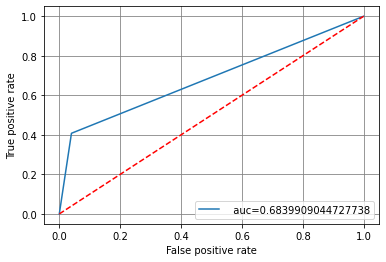

In [ ]:
#below are the ML models considered in this pipeline
pipe_LR=Pipeline(steps= [('model',LogisticRegression(random_state=0))])
pipe_KNN=Pipeline( steps= [('model',neighbors.KNeighborsClassifier())])
pipe_DT = Pipeline(steps = [('model',DecisionTreeClassifier(random_state=0))])
pipe_BT=Pipeline( steps= [('model',BaggingClassifier(random_state=0))])
pipe_RF=Pipeline(steps=[('model',RandomForestClassifier(random_state=0))])
pipe_GBT=Pipeline( steps= [('model',GradientBoostingClassifier(random_state=0))])
pipe_NB=Pipeline(steps=[('model',GaussianNB())])

#initializing hyperparamters for each model
LR_param={}
KNN_param={'model_n_neighbors':np.arange(1,21), 'modelmetric': ['euclidean', 'manhattan'], 'model_weights': ['uniform', 'distance']}
DT_param={'criterion':['entropy','gini']}
BT_param={'max_depth':np.arange(1,14), 'n_estimators': np.arange(1,100)}
RF_param={'max_depth':1,'n_estimators': np.arange(1,100), 'criterion':['entropy','gini']}
GBT_param={'max_dept':np.arange(1,30),'loss':['deviance'], 'learning_rate':1.0, 'n_estimators':np.arange(1,100)}
NB_param={}

#creating a lists of models and their hyperparameters respectively
model_name=['Logistic regression','KNN','Decision Tree','Bagging Tree','Random Forest','Gradient Boosting Tree','Naive Bayes']
pipe_list = [pipe_LR,pipe_KNN,pipe_DT,pipe_BT,pipe_RF,pipe_GBT,pipe_NB]
param_list=[LR_param,KNN_param,DT_param,BT_param,RF_param,GBT_param,NB_param]

#data type conversion of true outcomes from object to int
y=np.array(y_test)

#index holdingmodel name from model_name LIST
j=0

#pipeline for looping through pipe_list (list holding all the ML models)
for pipe in pipe_list:

  i=0
  optimized_model = GridSearchCV(pipe,param_list[i])
  optimized_model.fit(X_train, y_train)
  pred=optimized_model.predict(X_test)
  pred=np.array(pred)
  print('\n')
  t = PrettyTable(['Metric', 'Value']) #table columns for report generation
  t.title = model_name[j] #displaying model name as table title
  j=j+1
  tn, fp, fn, tp = confusion_matrix(y, pred).ravel() #computing confusion matrix components
  print('Best hyperparameters: ',optimized_model.get_params) #displaying set of best hyperparameters
  t.add_row(['Classification accuracy', accuracy_score(y_test,pred)]) #display accuracy score
  t.add_row(['F1 score', f1_score(y,pred,average='weighted')]) #display F1 score
  t.add_row(['Sensitivity',(tp/(tp+fn))]) #display sensitivity
  t.add_row(['Specificity',(tn/(tn+fp))]) #display specificity
  print(t)
  print('\n')

  #for AUC-ROC curve
  fpr, tpr, thresholds = roc_curve(y.astype(int), pred.astype(int))
  auc = metrics.roc_auc_score(y.astype(int), pred.astype(int))
  plt.plot(fpr,tpr,label="  auc="+str(auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier') 
  plt.grid(True,color='grey')
  plt.show()
  print('\n')
  i=i+1

  #considering Neural Network(NN)
  #since NN takes in scaled input, we call a separate function to display results
  if j==7: 
    NN_func()
    exit()


## Performing **FEATURE SELECTION** and **SCALING** for less accurate models

1. Logistic Regression

In [ ]:
#for improving accuracy on Logistic Regression other models
#implementing backward selection for selecting the best predictor
sfs1 = SFS(LogisticRegression(), 
           n_features_to_select=6, 
           direction='backward')

sfs1 = sfs1.fit(X_train, y_train)



In [ ]:
#for displaying the best predictors to select

feat_names = list(sfs1.feature_names_in_)
print(feat_names)

['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'hours_per_week', 'Native_country']


In [ ]:
#initializing train and test data
df_train_lr=df_train[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss','Income']]
df_test_lr=df_test[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss','Income']]

In [ ]:
#scaling train and test data (using Min-Max Scaler)
mms = MinMaxScaler()
df_train_lr[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss']] = mms.fit_transform(df_train_lr[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss']])
df_test_lr[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss']] = mms.fit_transform(df_test_lr[['Age', 'Education_num', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss']])

In [ ]:
#data partitioning into train and test
lr_X_train=df_train_lr.iloc[:,0:6]
lr_y_train=df_train_lr.iloc[:,6]
lr_X_test=df_test_lr.iloc[:,0:6]
lr_y_test=df_test_lr.iloc[:,6]

+--------------------------------------------------------+
| Logistic Regression with Sequential Forward Selection  |
+------------------------------+-------------------------+
|            Metric            |          Value          |
+------------------------------+-------------------------+
|   Classification accuracy    |    0.8207008964955175   |
|           F1 score           |    0.8025378566337747   |
|         Sensitivity          |   0.42454394693200664   |
|         Specificity          |    0.9497568881685575   |
+------------------------------+-------------------------+




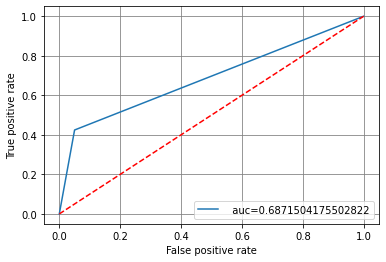

In [ ]:
#function for fitting Logistic Regression model on the above scaled data
def LR_func():
  lr_model = LogisticRegression(random_state=0)
  lr_model.fit(lr_X_train, lr_y_train)
  lr_pred = lr_model.predict(lr_X_test)
  y1=np.array(lr_y_test)
  t = PrettyTable(['Metric', 'Value'])
  t.title = 'Logistic Regression with Sequential Forward Selection'
  tn, fp, fn, tp = confusion_matrix(y1, lr_pred).ravel()
  t.add_row(['Classification accuracy', accuracy_score(y1.astype(int), lr_pred.astype(int))])
  t.add_row(['F1 score', f1_score(y1.astype(int), lr_pred.astype(int),average='weighted')])
  t.add_row(['Sensitivity',(tp/(tp+fn))])
  t.add_row(['Specificity',(tn/(tn+fp))])
  print(t)
  print('\n')
  fpr, tpr, thresholds = roc_curve(y1.astype(int), lr_pred.astype(int))
  auc = metrics.roc_auc_score(y1.astype(int), lr_pred.astype(int))
  plt.plot(fpr,tpr,label="  auc="+str(auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier') 
  plt.grid(True,color='grey')
  plt.show()

LR_func()



# **CONCLUSION**

Models with the accuracy achieved:


1) 

*   Name : Gradiant Boosting Tree
*   Accuracy : 0.853402

2) 

*   Name : Random Forest
*   Accuracy : 0.845965

3) 

*   Name : KNN
*   Accuracy : 0.8354726


4) 

*   Name : Neural network
*   Accuracy : 0.8243683

5) 

*   Name : Naive Bayes
*   Accuracy : 0.8052159

6) 

*   Name : Logistic Regression **WITHOUT** Feature Selection
*   Accuracy : 0.8072534

7) 

*   Name : Logistic Regression **WITH** Feature Selection
*   Accuracy : 0.8207008


---



It can be observed that Gradient Boosting Tree Random Forest in Decision Trees has the highest accuracy to classify whether income exceeds $50K/yr based on census data.

